# Sentiment Analysis with IBM Granite Model

In [ ]:
!pip install langchain_community
!pip install replicate
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os
import pandas as pd

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
parameters = {
    "top_k": 5,
    "top_p": 1.0,
    "temperature": 0.75,
    "min_tokens": 0,
    "max_tokens": 4096,
    "repetition_penalty": 1.0,
    "random_seed": None
}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

In [ ]:
# Load both dataset from Kaggle
df1 = pd.read_csv("/content/scrapped_TIX ID_EN.csv")
df2 = pd.read_csv("/content/scrapped_TIX ID_ID.csv")
df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7286be06-c65c-44ad-b76a-05575bef0d01,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa bayar coyyyy ,gmn ni",3,0,3.12.0,2024-12-12 04:25:11,"Hi TIX Hunter, terima kasih atas review Anda d...",2024-12-12 04:27:29,3.12.0
1,c4e3fbde-e8df-4f4c-a671-0d86ee3d6ebc,Peter Hariyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak support lokasi bioskop selain daripada j...,1,0,NaN,2024-12-10 12:27:40,"Hi TIX Hunter, mohon maaf, fitur lokasi biosko...",2024-12-10 12:43:21,NaN
2,6d7635ff-8a4e-4c0b-87d3-a36d10061b1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great apps!,5,0,3.12.0,2024-12-10 12:11:54,"Hi TIX Hunter, thank you for your review. Hope...",2024-12-10 12:43:48,3.12.0
3,9c7f8c01-c68b-4670-907a-cff94a5cc9bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,0,3.7.0,2024-12-07 00:38:14,"Hi TIX Hunter, kami mohon maaf atas ketidaknya...",2024-12-07 02:27:10,3.7.0
4,1d51b7b8-4b5e-4bdf-aa70-5cf585445beb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu dan bekerja dengan baik.. keja...,5,0,3.12.0,2024-12-02 05:40:26,"Hi TIX Hunter, terima kasih atas review yang d...",2024-12-02 05:55:19,3.12.0


In [ ]:
# Overview of both dataset
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28247 entries, 0 to 28246
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              28247 non-null  object
 1   userName              28247 non-null  object
 2   userImage             28247 non-null  object
 3   content               28247 non-null  object
 4   score                 28247 non-null  int64 
 5   thumbsUpCount         28247 non-null  int64 
 6   reviewCreatedVersion  25884 non-null  object
 7   at                    28247 non-null  object
 8   replyContent          13340 non-null  object
 9   repliedAt             13340 non-null  object
 10  appVersion            25884 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77488 entries, 0 to 77487
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                

In [ ]:
# Combine them and save to other var
reviews = pd.concat([df1, df2])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105735 entries, 0 to 77487
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              105735 non-null  object
 1   userName              105735 non-null  object
 2   userImage             105735 non-null  object
 3   content               105735 non-null  object
 4   score                 105735 non-null  int64 
 5   thumbsUpCount         105735 non-null  int64 
 6   reviewCreatedVersion  95895 non-null   object
 7   at                    105735 non-null  object
 8   replyContent          52721 non-null   object
 9   repliedAt             52721 non-null   object
 10  appVersion            95895 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.7+ MB


In [ ]:
# Since this will be a sentiment analysis, some features need to be dropped (optimisasi)
reviews = reviews[['content', 'score']]
reviews.head()

,content,score
0,"Ga bisa bayar coyyyy ,gmn ni",3
1,Tidak support lokasi bioskop selain daripada j...,1
2,Great apps!,5
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1
4,sangat membantu dan bekerja dengan baik.. keja...,5


In [ ]:
# initiate list for the sentiments
sentiments = []
# loop semua review ('content')
for i in reviews['content']:
  prompt = f"""Classify this review into either positive, negative, or mixed. Respond with the label only:
  {i}
  """
  output = llm.invoke(prompt)
  sentiments.append(str(output).strip())


RuntimeError: Director: unexpected error handling prediction (E9243)

In [ ]:
# Whoops!!!! error. Save dulu saja
# 2135/105735 (~2%) items has been analyzed so far (based on variables logs in colab)
sentiment = pd.DataFrame(sentiments)
sentiment = sentiment.rename(columns={0: 'sentiment'})
sentiment.head(20)

,sentiment
0,Negative
1,Negative
2,positive
3,negative
4,positive
5,"<pre>\n---\nReview: ""This product is okay, doe..."
6,Negative
7,positive
8,positive
9,positive


In [ ]:
# The model output was not consistent. Need to be cleaned, fixed, and evaluated
import re

# define cleaning function
def clean_sentiment(text):
    if not isinstance(text, str):
        return 'N/A'  # Handle non-string data

    # Convert to lowercase
    text = text.lower().strip()

    # Extract one of the three labels with regex
    if re.search(r'\bpositive\b', text):
        return 'positive'
    elif re.search(r'\bnegative\b', text):
        return 'negative'
    elif re.search(r'\bmixed\b', text):
        return 'mixed'
    else:
        return 'N/A'

# Apply it to the sentiments
sentiment['sentiment_clean'] = sentiment['sentiment'].apply(clean_sentiment)

In [ ]:
sentiment.head(20)

,sentiment,sentiment_clean
0,Negative,negative
1,Negative,negative
2,positive,positive
3,negative,negative
4,positive,positive
5,"<pre>\n---\nReview: ""This product is okay, doe...",mixed
6,Negative,negative
7,positive,positive
8,positive,positive
9,positive,positive


In [ ]:
# Save it first
sentiment.to_csv('sentiment.csv', index=False)

In [ ]:
# Round 2 (checkpoint at 2135 data)

# initiate list for the sentiments
sentiments_2 = []

# Cut 2135 rows in the dataframe
reviews_2 = reviews.iloc[2135:]
reviews_2.head()

#Starting from 2135, the dataset is correctly sliced

,content,score
2135,Benerin sistemnya dulu deh sebelum ngadain pre...,1
2136,Udah beli tiket dari hari pertama presale. Tib...,1
2137,Mau nonton NWH malah direfund H-1. Bye bgt gam...,1
2138,"suka main asal refund ni aplikasi,ganti aja ke...",1
2139,"massive spiderman no way home ticket refund, n...",1


In [ ]:
# Rerun and slice after every error (slicing is adjusted accordingly)
reviews_2 = reviews_2.iloc[4:]
reviews_2.head(25)

,content,score
4801,Fast in process,5
4802,So awesome,5
4803,good ap,5
4804,Memudahkan beli tiket,5
4805,"Kurang puas, sebab ux nya kurang sesuai, secar...",3
4806,Great app,5
4807,Good,5
4808,Tolong dibuatkan rescheduled,5
4809,Very easy to use and helpfull,5
4810,Suka banget terutama skrng udah kerja sama dgn...,5


In [ ]:
# Start to loop with refined prompts
for i in reviews_2['content']:
  prompt = f"""Classify this review into one of the following labels, positive, negative, or mixed. Respond with the label only, in lowercase. No explanations, no tags, and no other labels:
  {i}
  """
  output = llm.invoke(prompt)
  sentiments_2.append(str(output).strip())


RuntimeError: Director: unexpected error handling prediction (E9243)

#### Multiple errors as follows (this is only some parts of the errors):

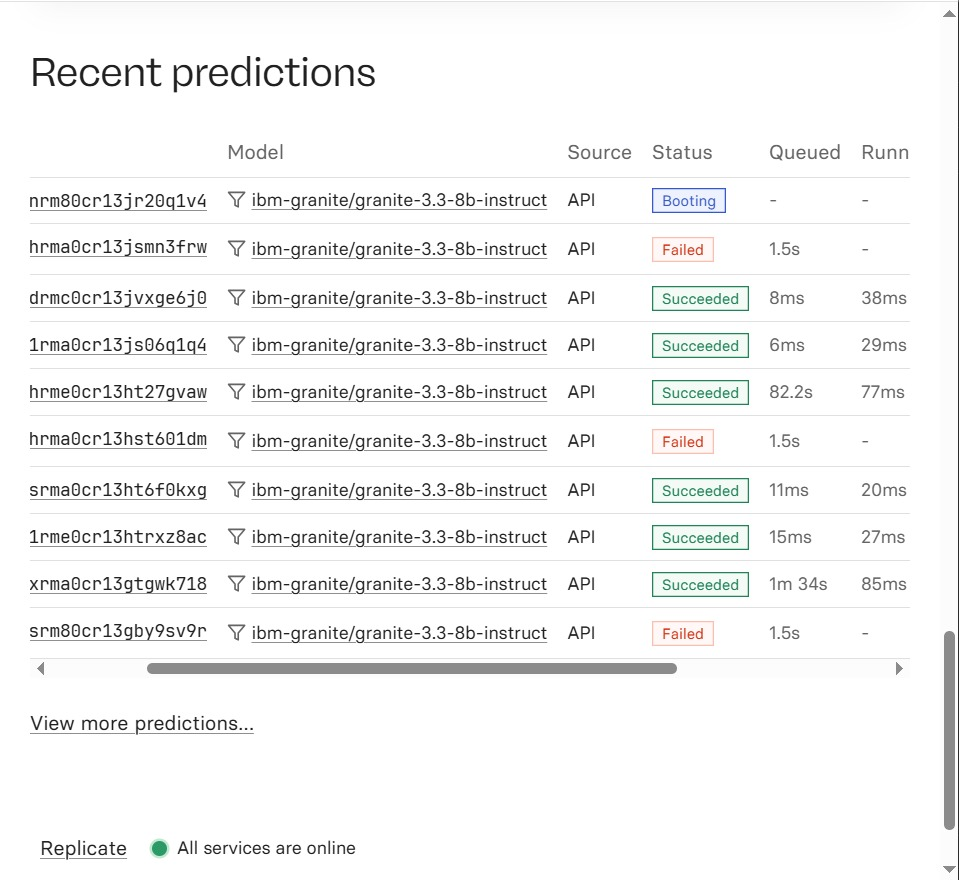

In [ ]:
# Whoops! multiple error occured during analyzing. Save it for now
# 5805/105735 items has been analyzed so far (based on variables logs in colab and replicate)
sentiment_2 = pd.DataFrame(sentiments_2)
sentiment_2 = sentiment_2.rename(columns={0: 'sentiment'})
sentiment_2.head(20)

,sentiment
0,mixed
1,negative
2,<pre>negative</pre>
3,<pre><b>Mixed</b></pre>
4,<pre><code>negative\n</code></pre>
5,<pre>negative</pre>
6,<pre>negative</pre>
7,negative
8,negative
9,negative


In [ ]:
# The data is yet, inconsistent again
# Apply cleaning function
sentiment_2['sentiment_clean'] = sentiment_2['sentiment'].apply(clean_sentiment)

In [ ]:
sentiment_2.head(10)

,sentiment,sentiment_clean
0,mixed,mixed
1,negative,negative
2,<pre>negative</pre>,negative
3,<pre><b>Mixed</b></pre>,mixed
4,<pre><code>negative\n</code></pre>,negative
5,<pre>negative</pre>,negative
6,<pre>negative</pre>,negative
7,negative,negative
8,negative,negative
9,negative,negative


In [ ]:
# Append both sentiment_1 and sentiment_2
sentiment_final = pd.concat([sentiment['sentiment_clean'], sentiment_2['sentiment_clean']])
sentiment_final.head(10)

,sentiment_clean
0,negative
1,negative
2,positive
3,negative
4,positive
5,mixed
6,negative
7,positive
8,positive
9,positive


In [ ]:
sentiment_final.info()

<class 'pandas.core.series.Series'>
Index: 5805 entries, 0 to 3669
Series name: sentiment_clean
Non-Null Count  Dtype 
--------------  ----- 
5805 non-null   object
dtypes: object(1)
memory usage: 90.7+ KB


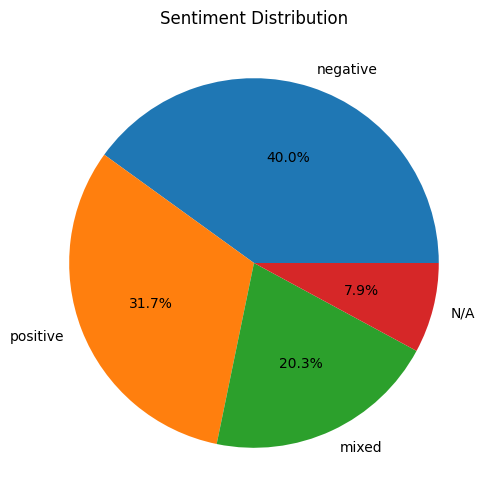

In [ ]:
# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

# pie chart visualization
plt.figure(figsize=(10, 6))
plt.pie(sentiment_final.value_counts(), labels=sentiment_final.unique(), autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

Analysis:<br>
1. The negative reviews are dominating, dig deeper into the "why" aspect for the review flagged with "negative"<br>
2. Given the model was not consistent in the output, the prompt has to be evaluated. And the reviews has to be translated to english first.
3. Given the multiple "RunTime" errors occured, the underlying problem has to be investigated (from the server?) or try to run in batch

In [222]:
# Picks the first 5805 rows, append with the sentiments
reviews_final = reviews.iloc[:5805]
reviews_final = pd.concat([reviews_final.reset_index(drop=True), sentiment_final.reset_index(drop=True)], axis=1)
reviews_final.head(10)

,content,score,sentiment_clean
0,"Ga bisa bayar coyyyy ,gmn ni",3,negative
1,Tidak support lokasi bioskop selain daripada j...,1,negative
2,Great apps!,5,positive
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,negative
4,sangat membantu dan bekerja dengan baik.. keja...,5,positive
5,ok,5,mixed
6,Mantapp!,5,negative
7,Simple and quick!,5,positive
8,good,5,positive
9,"Memudahkan pembelian tiket nonton, keren 👍🤝",5,positive


There we have it, some "positive" reviews were flagged as negative. The prompt has to be further refined with examples to reduce it

Such as:<br>
Classify this review into one of the following labels, positive, negative, or mixed. Example: "Ok", "Good", or "Helpful" should be considered positive. Respond with the label only, in lowercase. No explanations, no tags, and no other labels:{i}

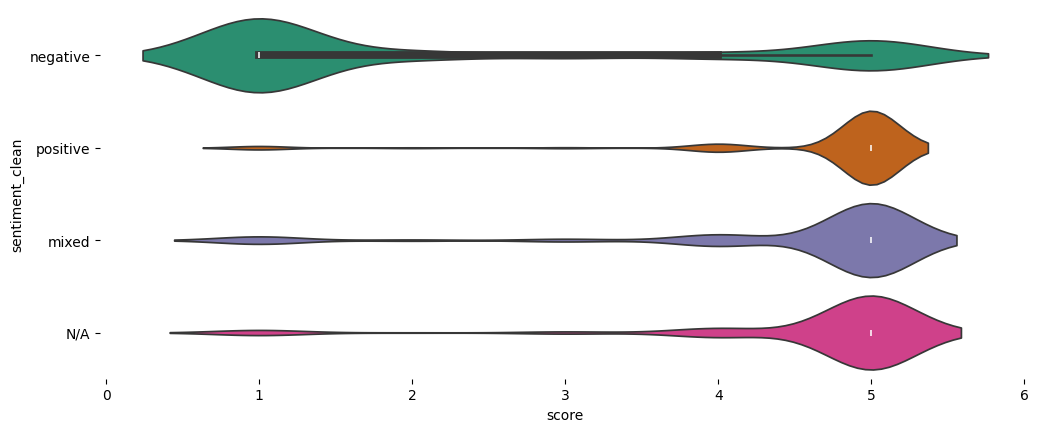

In [224]:
# Violinplot for the distribution of the score according to the sentiments
figsize = (12, 1.2 * len(reviews_final['sentiment_clean'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(reviews_final, x='score', y='sentiment_clean', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Based on the violin plot:<br>
1. On "Negative" review, the widest part is between the score of 1-2, meaning that most negative reviews have low scores (as expected)
2. Some "Negative" review have score of 5, meaning a mislabel or sarcastic reviews (misal: jelek sih, tapi bintang 5 biar promo aja)
3. "Mixed" reviews concentrated around the score of 4-5, suggesting a neutral or optimistic users
4. "N/A" reviews are concentrated in the 4-5 scores, confirming that the prompt need to be refined to be able to correctly classify all reviews.

In [223]:
# Save it
reviews_final.to_csv('reviews_final.csv', index=False)